IMPORTING LIB

In [1]:
import pandas as pd
import numpy as np

READ CSV FILE

In [2]:
crop= pd.read_csv("Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
crop.duplicated().sum()


np.int64(0)

In [7]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
print(crop.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [9]:
numeric_crop = crop.drop(columns=['label'])


In [10]:
correlation_matrix = numeric_crop.corr()


In [11]:
correlation_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

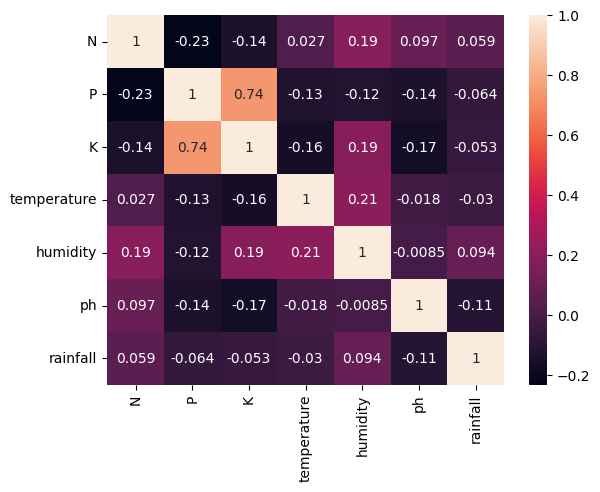

In [12]:
import seaborn as sns
sns.heatmap(correlation_matrix,annot= True, cbar=True)

In [13]:
import seaborn as sns


In [14]:
crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
import matplotlib.pyplot as plt

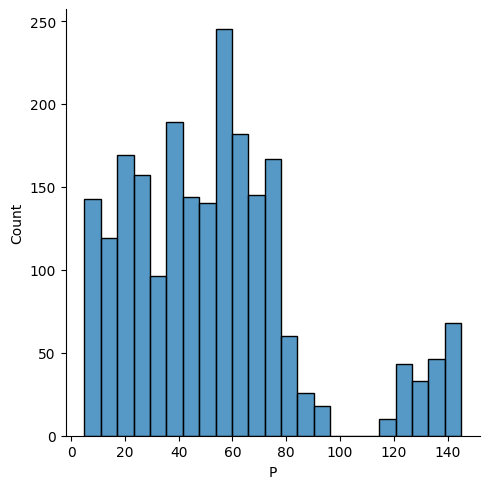

In [17]:
import matplotlib.pyplot as plt
sns.displot(crop['P'])
plt.show()

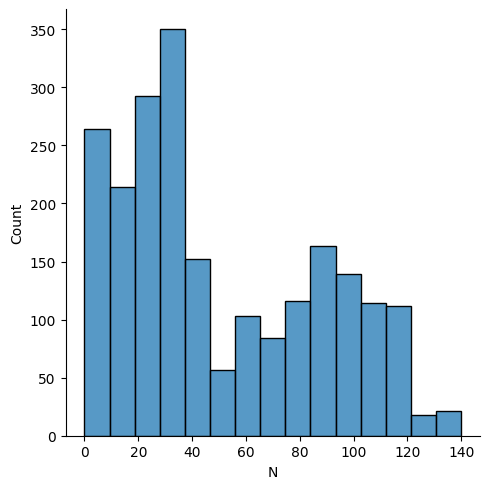

In [18]:
import matplotlib.pyplot as plt
sns.displot(crop['N'])
plt.show()

MAPPING THE VALUES

In [19]:
crop.label.unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [20]:
crop_dict = {
    'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4,
    'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8,
    'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12,
    'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16,
    'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20,
    'jute': 21, 'coffee': 22
}
crop['label'] = crop['label'].map(crop_dict)

In [21]:
crop.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [22]:
print(crop.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [23]:
# Step 1: Identify the actual column name
print(crop.columns)

# Step 5: Check if any values failed to map (NaNs)
print("Unmapped rows:")
print(crop[crop['label'].isna()])


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Unmapped rows:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [24]:
# 1. Check original values without converting to string
print("Original labels:")
print(crop['label'].head(10))  # see what's in the label column

# 2. Check for actual NaNs
print("Are they real NaNs?")



Original labels:
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64
Are they real NaNs?


In [25]:
print(crop['label'].unique())
print(crop_dict.keys())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
dict_keys(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])


In [26]:

print(crop['label'].unique())


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [27]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [28]:
crop.label.value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [29]:
X =crop.drop('label',axis=1)
y=crop['label']


In [30]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

TRAINING THE MODEL

In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import sys
print(sys.executable)


/Users/adityamukherjee/Desktop/crop recommendation /.venv/bin/python


In [34]:
from sklearn.model_selection import train_test_split


In [35]:
import sys
print(sys.executable)


/Users/adityamukherjee/Desktop/crop recommendation /.venv/bin/python


In [36]:
import sys
print(sys.executable)


/Users/adityamukherjee/Desktop/crop recommendation /.venv/bin/python


In [37]:
X_train.shape

(1760, 7)

In [38]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [39]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test =sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import accuracy_score 

In [43]:
models = {
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Bagging": BaggingClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Extra Tree": ExtraTreeClassifier()
}

ACCURACY SCORE FOR THE MODELS


In [44]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} Model with Accuracy: {score}")

Logistic Regression Model with Accuracy: 0.9636363636363636
SVM Model with Accuracy: 0.9681818181818181
Naive Bayes Model with Accuracy: 0.9954545454545455
KNN Model with Accuracy: 0.9659090909090909
Random Forest Model with Accuracy: 0.9931818181818182
Bagging Model with Accuracy: 0.990909090909091
Gradient Boosting Model with Accuracy: 0.9818181818181818
AdaBoost Model with Accuracy: 0.14545454545454545
Decision Tree Model with Accuracy: 0.9886363636363636
Extra Tree Model with Accuracy: 0.9068181818181819


RANDOM FOREST CLASSIFIER ACCURACY

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9931818181818182

In [46]:
crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [47]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Make sure you don't refit the scalers; just transform
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Use the same scalers used on the training data
    mx_features = mx.transform(features)
    sc_mx_features = sc.transform(mx_features)
    
    # Predict using the already trained model
    prediction = rf.predict(sc_mx_features)
    return prediction[0]



PREDICTION VALUES INPUT

Banana

In [48]:
# Sample 1:
N = 120  
P = 100  
K = 200  
temperature = 27  
humidity = 85  
ph = 6.5  
rainfall = 250  


Papaya

In [49]:
# Sample 2:
N = 45  
P = 55  
K = 50  
temperature = 19  
humidity = 60  
ph = 6.5  
rainfall = 110  


Mango

In [50]:
# Sample 3:
N = 40  
P = 35  
K = 35  
temperature = 20.0  
humidity = 55.0  
ph = 6.7  
rainfall = 95.0


Coffee

In [51]:
# Sample 4:
N = 117  
P = 33  
K = 42  
temperature = 22.0  
humidity = 60.0  
ph = 6.3  
rainfall = 160.0

Rice

In [52]:
# Sample 5:
N = 100  
P = 55  
K = 40  
temperature = 24  
humidity = 82  
ph = 6.5  
rainfall = 250

In [53]:
predict = recommendation(N, P, K, temperature, humidity, ph, rainfall)
inv_crop_dict = {v: k for k, v in crop_dict.items()}
result = inv_crop_dict[predict]
print("Predicted Crop:", result)


Predicted Crop: rice


/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [54]:
print(crop_dict)



{'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}


In [55]:
crop.shape

(2200, 8)

In [60]:
import pickle
pickle.dump(rf,open('model.pkl', 'wb'))
pickle.dump(mx,open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc,open('standardscaler.pkl', 'wb'))
    

In [59]:
import sys
!{sys.executable} -m pip install requests

zsh:1: no such file or directory: /Users/adityamukherjee/Desktop/crop


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")



In [63]:
# Features and labels
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']



In [64]:
# Encode labels if necessary
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Save the label order for mapping during prediction
crop_list = list(encoder.classes_)
with open('crop_list.pkl', 'wb') as f:
    pickle.dump(crop_list, f)


In [65]:
df['N_P'] = df['N'] * df['P']
df['K_ph'] = df['K'] * df['ph']
df['temp_humidity'] = df['temperature'] * df['humidity']


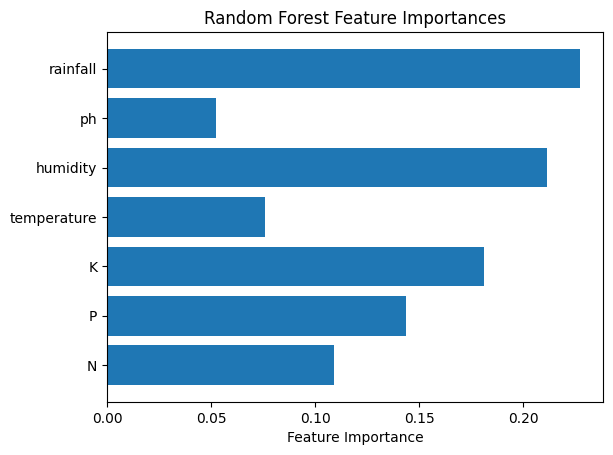

In [67]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [69]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)  # all features
y = df['label']               # target crop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [71]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {acc:.4f}")


Random Forest Accuracy: 0.9932
Logistic Regression Accuracy: 0.9341
SVM Accuracy: 0.5636
Decision Tree Accuracy: 0.9818
K-Nearest Neighbors Accuracy: 0.7136
Naive Bayes Accuracy: 0.9886


/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.88      1.00      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [73]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-Val Accuracy: {scores.mean():.4f}")


Random Forest Cross-Val Accuracy: 0.9923


/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Logistic Regression Cross-Val Accuracy: 0.9618
SVM Cross-Val Accuracy: 0.5736
Decision Tree Cross-Val Accuracy: 0.9868
K-Nearest Neighbors Cross-Val Accuracy: 0.7327
Naive Bayes Cross-Val Accuracy: 0.9923


Decision Tree Accuracy: 0.9864
Random Forest Accuracy: 0.9932


/var/folders/dn/hqfb8s013pgg97cjfz2c0zlh0000gn/T/ipykernel_1929/1021119294.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


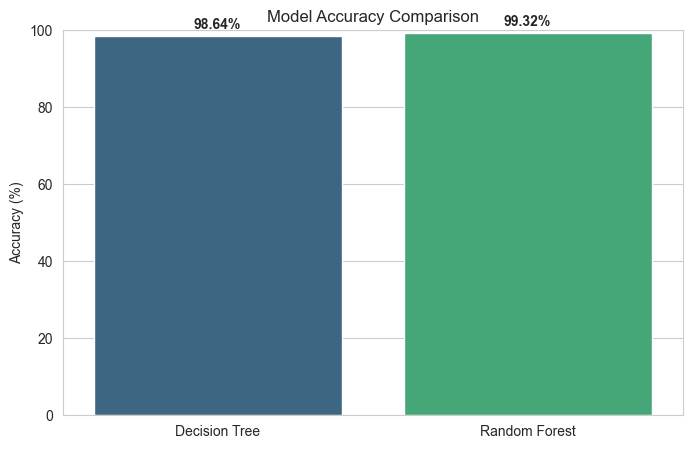

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train both models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Accuracy scores
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Show accuracy results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# 📊 Plotting accuracies
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy * 100, rf_accuracy * 100]

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', va='bottom', fontweight='bold')
plt.show()


/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/adityamukherjee/Desktop/crop recommendation /.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

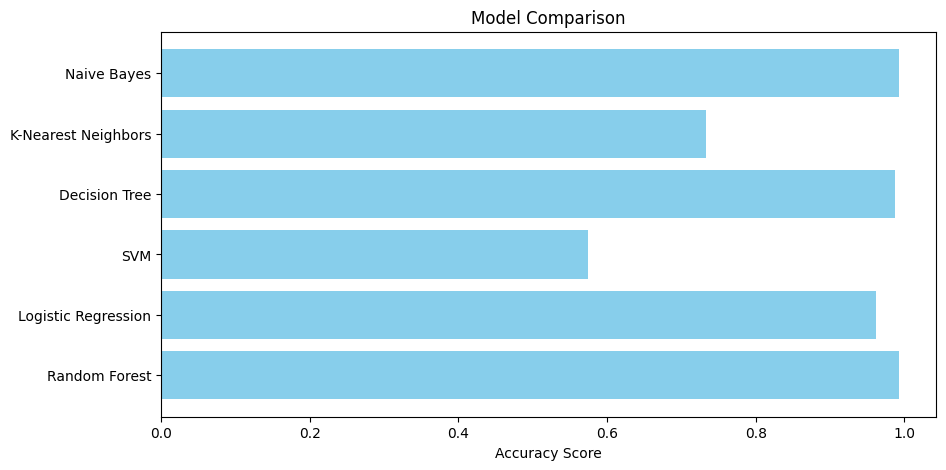

In [74]:
import matplotlib.pyplot as plt

results = []
names = []

for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5).mean()
    results.append(score)
    names.append(name)

plt.figure(figsize=(10, 5))
plt.barh(names, results, color='skyblue')
plt.xlabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()


In [76]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train both models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Save both models
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Models saved successfully.")


Models saved successfully.


In [78]:
from collections import deque
history = deque(maxlen=5)
